<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-/blob/master/Time_Series_Analysis_Prediction_On_Nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/niftydata.csv',parse_dates=True,squeeze=True,names=['Dates','Stocks'])

In [ ]:
data.head()

,Dates,Stocks
0,9/17/2007,4494.649902
1,9/18/2007,4546.200195
2,9/19/2007,4732.350098
3,9/20/2007,4747.549805
4,9/21/2007,4837.549805


In [ ]:
data.tail()

,Dates,Stocks
2514,11/23/2017,10348.75000
2515,11/24/2017,10389.70020
2516,11/27/2017,10399.54981
2517,11/28/2017,10370.25000
2518,11/29/2017,10361.30000


In [ ]:
data['Dates']

dtype('O')

In [ ]:
data['Dates']= pd.to_datetime(data['Dates'],yearfirst=True,format='%yy-%mm-%dd')

In [ ]:
data['Dates']

0      2007-09-17
1      2007-09-18
2      2007-09-19
3      2007-09-20
4      2007-09-21
          ...    
2514   2017-11-23
2515   2017-11-24
2516   2017-11-27
2517   2017-11-28
2518   2017-11-29
Name: Dates, Length: 2519, dtype: datetime64[ns]

In [ ]:
data.size

5038

In [ ]:
data.shape

(2519, 2)

In [ ]:
data.describe()

,Stocks
count,2495.000000
mean,6331.771002
std,1785.887216
min,2524.199951
25%,5121.125000
50%,5860.950195
75%,7959.724853
max,10452.500000


In [ ]:
data.set_index(data['Dates'],inplace=True)

In [ ]:
data.drop(columns=['Dates'],inplace=True)

# Resampling.

In [ ]:
data['2017-01'][:5]

,Stocks
Dates,
2017-01-02,8179.500000
2017-01-03,8192.250000
2017-01-04,8190.500000
2017-01-05,8273.799805
2017-01-06,8243.799805


In [ ]:
data['2015-01'][:5]

,Stocks
Dates,
2015-01-01,NaN
2015-01-02,8395.450195
2015-01-05,8378.400391
2015-01-06,8127.350098
2015-01-07,8102.100098


In [ ]:
asfrequency_data = data.asfreq('2M',method='pad')

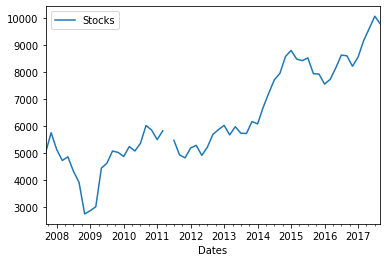

In [108]:
asfrequency_data.plot()

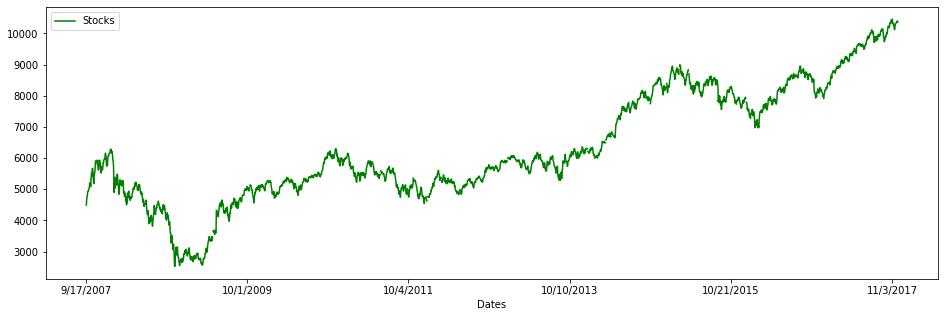

In [ ]:
data.plot(color='g',figsize=(16,5))

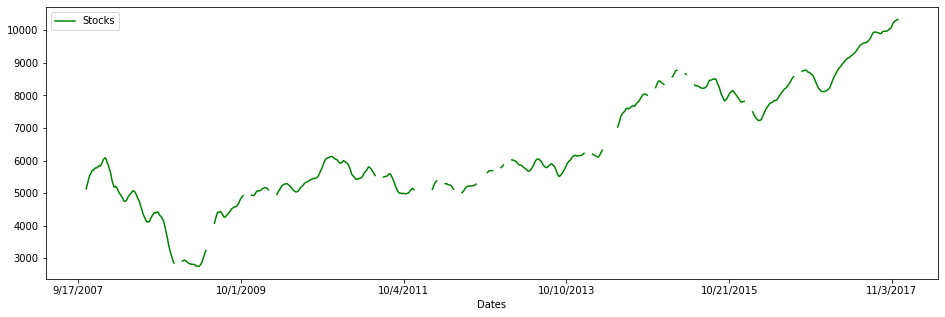

In [ ]:
data.rolling(window=25).mean().plot(color='g',figsize=(16,5))
plt.show()

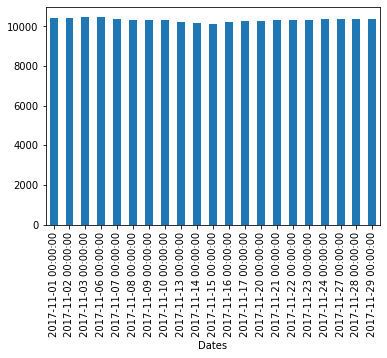

In [ ]:
data['Stocks']['2017-11'].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

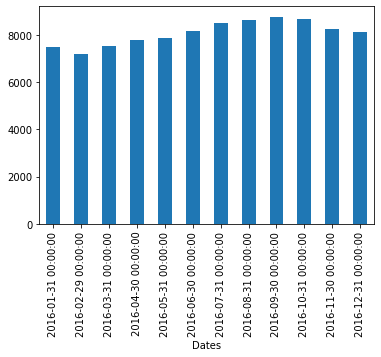

In [ ]:
data['2016']['Stocks'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()
#Monthy basis resampling done

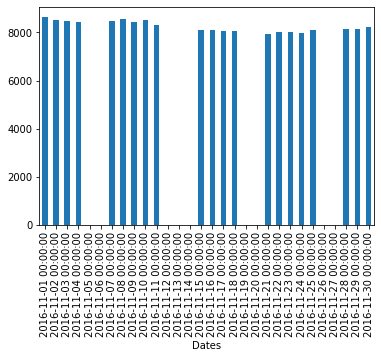

In [ ]:
data['2016-11']['Stocks'].resample('D').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()
#Daily basis resampling done

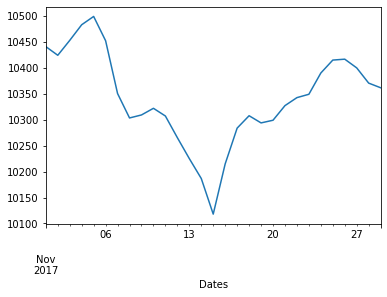

In [ ]:
daily_rpled =data['2017-11']['Stocks'].resample('D')
daily_rpled.interpolate(method='spline',order=2).plot()

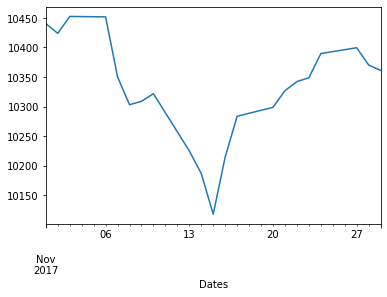

In [ ]:
daily_rpled =data['2017-11']['Stocks'].resample('D')
daily_rpled.interpolate(method='linear').plot()

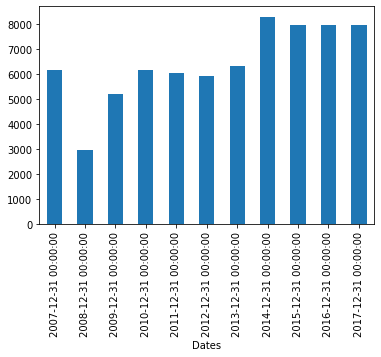

In [ ]:
annualy_rpled =data['Stocks'].resample('A')
annualy_rpled.interpolate(method='linear').plot(kind='bar')
plt.show()
#Annualy resampling done.

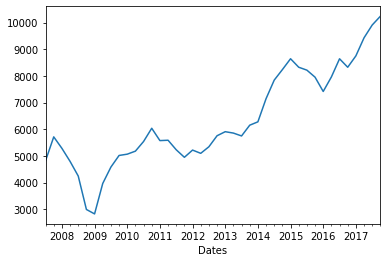

In [110]:
qurterly_resampling = data['Stocks'].resample('Q').mean()
qurterly_resampling.interpolate(method='spline',order=2).plot()

In [115]:
from pandas.plotting import autocorrelation_plot

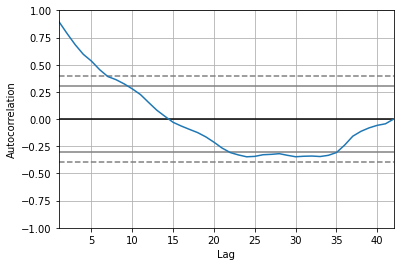

In [117]:
autocorrelation_plot(qurterly_resampling)
plt.show()

#value of the auto-correlation will be here 5,6 or 7 becasue if we see the line is beaking at the point at that we need to consider the lag.

In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

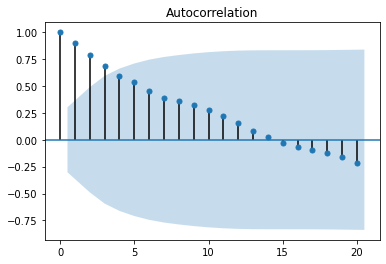

In [121]:
plot_acf(qurterly_resampling,lags=20)
plt.show()

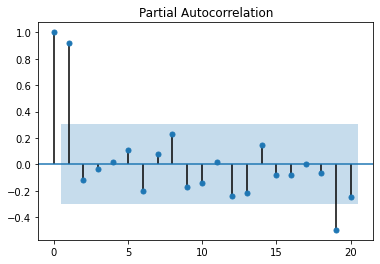

In [122]:
plot_pacf(qurterly_resampling,lags=20)
plt.show()
#HERE WE CAN see the lag which is beyond the critical rigion that is two here.
#that means our q is 2.
#p can be 2,3,
# and is 1 over here.

In [124]:
from statsmodels.tsa.arima_model import ARIMA

In [128]:
model = ARIMA(qurterly_resampling,order=(5,1,1))
model_fit = model.fit()

In [130]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Stocks   No. Observations:                   41
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -303.063
Method:                       css-mle   S.D. of innovations            375.613
Date:                Tue, 30 Jun 2020   AIC                            622.125
Time:                        12:00:32   BIC                            635.834
Sample:                    12-31-2007   HQIC                           627.117
                         - 12-31-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            139.3839     16.703      8.345      0.000     106.647     172.121
ar.L1.D.Stocks     1.2734      0.156      8.150      0.000       0.967       1.580
ar.L2.D.Stocks    -0.6207      0.245     -2.538      0.016      -1.100      -0.141
ar.L3.D.Stocks     0.3466      0.255      1.358      0.183      -0.154       0.847
ar.L4.D.Stocks    -0.5614      0.237     -2.373      0.023      -1.025      -0.098
ar.L5.D.Stocks     0.2939      0.168      1.745      0.090      -0.036       0.624
ma.L1.D.Stocks    -1.0000      0.099    -10.052      0.000      -1.195      -0.805
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6961           -1.1242j            1.3222           -0.3382
AR.2           -0.6961           +1.1242j            1.3222            0.3382
AR.3            0.9261           -0.6961j            1.1586           -0.1026
AR.4            0.9261           +0.6961j            1.1586            0.1026
AR.5            1.4498           -0.0000j            1.4498           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

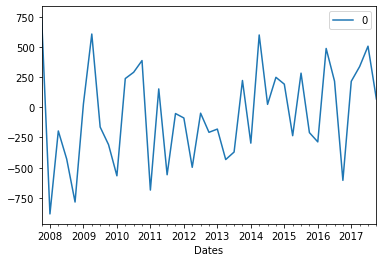

In [132]:
residuals=pd.DataFrame(model_fit.resid)
residuals
residuals.plot()

In [ ]:
#Here we are founding that there is some trend avalible so we need horizontal line from we cansider there is no error 
#we need to cahnge the parameter in order to get the less resuduals.


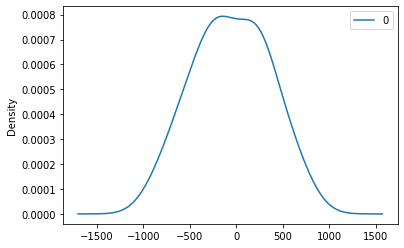

In [133]:
residuals.plot(kind='kde')
plt.show()

In [134]:
residuals.describe()

,0
count,41.000000
mean,-54.492587
std,404.847750
min,-882.758354
25%,-309.314703
50%,-51.806423
75%,237.787146
max,753.681392
